In [1]:
from pandas import read_csv, DataFrame
from pandas.plotting import autocorrelation_plot
from datetime import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
def parser(x):
    return datetime.strptime(x, '%m/%d/%Y')

Index(['price_eurusd', 'open_eurusd', 'high_eurusd', 'low_eurusd',
       'change_eurusd', 'bid', 'price_sp500', 'open_sp500', 'high_sp500',
       'low_sp500', 'change_sp500'],
      dtype='object')


<AxesSubplot:title={'center':'Evolución del precio del dólar en colones'}, xlabel='date', ylabel='USD'>

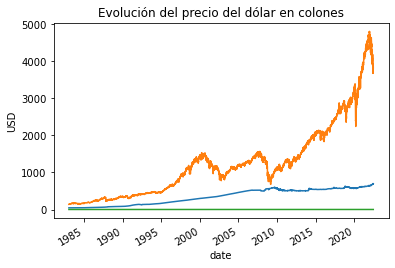

In [2]:
data = read_csv('../full_dataset.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser).drop(['ask'], axis=1)
print(data.columns)
data['bid'].plot(ylabel='CRC', title="Evolución del precio del dólar en colones")
data['price_sp500'].plot(ylabel='USD', title="Evolución del precio del euro en dólares")
data['price_eurusd'].plot(ylabel='USD', title="Evolución del precio del dólar en colones")
# model = ARIMA(series, order=(5, 1, 0))
# model_fit = model.fit()

# print(model_fit.summary())

# residuals = DataFrame(model_fit.resid)
# residuals.plot()
# pyplot.show()

# residuals.plot(kind='kde')
# pyplot.show()

# print(residuals.describe())

In [30]:
model = auto_arima(data['bid'], m=12, seasonal=True, start_p=0, start_q=0, max_order=4, test='adf', stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=8.26 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=28387.194, Time=0.20 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=27320.226, Time=1.71 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=27279.915, Time=2.36 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=28426.654, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=27279.166, Time=0.88 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=27279.882, Time=2.09 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=10.92 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=27264.175, Time=2.52 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=27264.862, Time=3.45 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=27264.895, Time=4.18 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=20.77 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=27320.021, Time=0.81 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=27197.047, Time=3.41 sec
 ARIMA(2,1,1)(1,0,0)[

In [54]:
# ARIMA(4,1,3)(2,0,1)[12] 
# train = data[(data.get_level_values(0) >= datetime.strptime('2005-05-15', "%Y-%m-%d")) and data.index.get_level_values(0) <= datetime.strptime('2017-04-30', "%Y-%m-%d")]
# data > datetime.strptime('2005-05-15', "%Y-%m-%d")
train = data['1983-01-04' : '2021-06-05']
test = data['2021-06-06' : '2022-07-01']

In [57]:
model.fit(data['bid'])

ARIMA(order=(4, 1, 3), scoring_args={}, seasonal_order=(2, 0, 1, 12),
      suppress_warnings=True)

In [63]:
forecast = model.predict(n_periods=30, return_conf_int=True)

In [64]:
forecast

(array([694.43259052, 695.02010092, 695.32609769, 695.59537594,
        695.68512171, 695.64897912, 695.64559791, 695.57931182,
        695.658433  , 695.7554843 , 695.75937442, 695.9026711 ,
        695.98784692, 696.23236491, 696.47402656, 696.59745369,
        696.74281746, 696.74927438, 696.74482462, 696.79711377,
        696.82493482, 696.94104314, 696.98620541, 697.05629914,
        697.18935379, 697.33889625, 697.52364081, 697.65856307,
        697.73066614, 697.7972801 ]),
 array([[692.57932225, 696.28585879],
        [691.91938765, 698.12081418],
        [691.3182491 , 699.33394627],
        [690.87275611, 700.31799577],
        [690.41167576, 700.95856766],
        [689.92554766, 701.37241059],
        [689.52597373, 701.76522208],
        [689.12167061, 702.03695302],
        [688.88340996, 702.43345604],
        [688.68733499, 702.8236336 ],
        [688.41952518, 703.09922365],
        [688.2949755 , 703.5103667 ],
        [688.11245616, 703.86323768],
        [688.0886573